In [1]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import lag_plot

In [2]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [3]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

amadeus = df[df['empresa'] == 'Amadeus']

amadeus.shape

(1325, 10)

In [4]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

amadeus = amadeus [['date','open','high','low','close','adj close']]

amadeus.shape

(1325, 6)

In [5]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

amadeus['date'] = pd.to_datetime(amadeus['date'], format="%Y-%m-%d")

amadeus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 5975 to 7299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [6]:
# Paso 5: Ordenar el DF por fecha

amadeus.sort_values(by='date',ascending= True, inplace=True)

amadeus.head()

,date,open,high,low,close,adj close
6865,2019-01-02,60.740002,61.580002,59.820000,61.439999,58.832066
6864,2019-01-03,60.660000,60.759998,58.060001,58.060001,55.595539
6863,2019-01-04,58.619999,60.220001,58.220001,60.060001,57.510647
6862,2019-01-07,60.700001,60.900002,59.560001,60.619999,58.046875
6861,2019-01-08,60.619999,62.439999,60.540001,62.160000,59.521503


In [7]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

amadeus = amadeus[(amadeus['date'] >= fecha_inicio) & (amadeus['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

amadeus.shape

(812, 6)

In [8]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=amadeus['date'].min(), end=amadeus['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

amadeus = amadeus.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

amadeus = amadeus.rename(columns={'index': 'date'})

In [9]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

amadeus.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,60.740002,61.040001,57.360001,58.060001,57.015018
1,2021-01-05,57.660000,58.580002,57.500000,58.220001,57.172134
2,2021-01-06,58.619999,59.880001,57.540001,59.580002,58.507660
3,2021-01-07,57.799999,58.160000,55.619999,56.799999,55.777691
4,2021-01-08,57.459999,57.639999,56.540001,57.099998,56.072292
5,2021-01-09,NaN,NaN,NaN,NaN,NaN
6,2021-01-10,NaN,NaN,NaN,NaN,NaN
7,2021-01-11,57.000000,57.919998,56.080002,56.240002,55.227776
8,2021-01-12,56.639999,57.560001,56.500000,57.259998,56.229412
9,2021-01-13,57.220001,57.599998,56.560001,56.740002,55.718777


In [10]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

amadeus = amadeus.fillna(method='ffill')

In [11]:
# Paso 10: Comprobar que se han introducido los valores correctamente


amadeus.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,60.740002,61.040001,57.360001,58.060001,57.015018
1,2021-01-05,57.660000,58.580002,57.500000,58.220001,57.172134
2,2021-01-06,58.619999,59.880001,57.540001,59.580002,58.507660
3,2021-01-07,57.799999,58.160000,55.619999,56.799999,55.777691
4,2021-01-08,57.459999,57.639999,56.540001,57.099998,56.072292
5,2021-01-09,57.459999,57.639999,56.540001,57.099998,56.072292
6,2021-01-10,57.459999,57.639999,56.540001,57.099998,56.072292
7,2021-01-11,57.000000,57.919998,56.080002,56.240002,55.227776
8,2021-01-12,56.639999,57.560001,56.500000,57.259998,56.229412
9,2021-01-13,57.220001,57.599998,56.560001,56.740002,55.718777


In [12]:
# Paso 11: Establecer columna 'date' como índice para modelo

amadeus = amadeus.set_index('date')

amadeus.head(10)

,open,high,low,close,adj close
date,,,,,
2021-01-04,60.740002,61.040001,57.360001,58.060001,57.015018
2021-01-05,57.660000,58.580002,57.500000,58.220001,57.172134
2021-01-06,58.619999,59.880001,57.540001,59.580002,58.507660
2021-01-07,57.799999,58.160000,55.619999,56.799999,55.777691
2021-01-08,57.459999,57.639999,56.540001,57.099998,56.072292
2021-01-09,57.459999,57.639999,56.540001,57.099998,56.072292
2021-01-10,57.459999,57.639999,56.540001,57.099998,56.072292
2021-01-11,57.000000,57.919998,56.080002,56.240002,55.227776
2021-01-12,56.639999,57.560001,56.500000,57.259998,56.229412


In [13]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

amadeus.index = pd.DatetimeIndex(amadeus.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

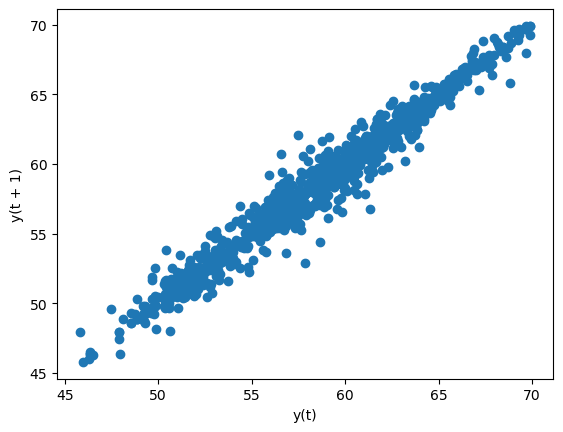

In [14]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

lag_plot(amadeus.close)

In [15]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [16]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = amadeus.close[:-10], amadeus.close[-10:]

train.shape, test.shape

((1143,), (10,))

In [17]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [18]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(amadeus.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    61.357606
2024-02-22    61.315869
2024-02-23    61.274781
2024-02-24    61.234331
2024-02-25    61.194509
2024-02-26    61.155307
2024-02-27    61.116713
2024-02-28    61.078720
2024-02-29    61.041316
2024-03-01    61.004494
Freq: D, dtype: float64

In [19]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    61.299999
2024-02-22    61.320000
2024-02-23    60.259998
2024-02-24    60.259998
2024-02-25    60.259998
2024-02-26    59.860001
2024-02-27    59.580002
2024-02-28    58.680000
2024-02-29    54.380001
2024-03-01    57.000000
Freq: D, Name: close, dtype: float64

In [20]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

1.8881911271328975

In [21]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,61.299999,61.357606,0.057607
2024-02-22,61.320000,61.315869,-0.004131
2024-02-23,60.259998,61.274781,1.014783
2024-02-24,60.259998,61.234331,0.974333
2024-02-25,60.259998,61.194509,0.934511
2024-02-26,59.860001,61.155307,1.295306
2024-02-27,59.580002,61.116713,1.536711
2024-02-28,58.680000,61.078720,2.398720
2024-02-29,54.380001,61.041316,6.661315
2024-03-01,57.000000,61.004494,4.004494
